<a href="https://colab.research.google.com/github/FelipeGBarreto/Projects/blob/master/Acidentes_Rodovias_Federais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=8 color=purple face=timesnewroman><b><i>Análise de Acidentes de Trânsito nas Rodovias Federais no Brasil</i></b>

<font color=red size=5>OBS.: Análise em construção!!

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_07 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2007.csv", sep=';', encoding='latin-1')
df_08 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2008.csv", sep=';', encoding='latin-1')
df_09 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2009.csv", sep=';', encoding='latin-1')
df_10 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2010.csv", sep=';', encoding='latin-1')
df_11 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2011.csv", sep=';', encoding='latin-1')
df_12 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2012.csv", sep=';', encoding='latin-1')
df_13 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2013.csv", sep=';', encoding='latin-1')
df_14 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2014.csv", sep=';', encoding='latin-1')
df_15 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2015.csv", sep=';', encoding='latin-1')
df_16 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2016.csv", sep=';', encoding='latin-1')
df_17 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2017.csv", sep=';', encoding='latin-1')
df_18 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2018.csv", sep=';', encoding='latin-1')
df_19 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2019.csv", sep=';', encoding='latin-1')
df_20 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados - Acidentes de Trânsito - DENATRAN/datatran2020.csv", sep=';', encoding='latin-1')

df = df_20.append(df_19.append(df_18.append(df_17.append(df_16.append(df_15.append(df_14.append(df_13.append(df_12.append(df_11.append(df_10.append(df_09.append(df_08.append(df_07)))))))))))))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
dataset = df.copy()

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1804078 entries, 0 to 127674
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      float64
 1   data_inversa            object 
 2   dia_semana              object 
 3   horario                 object 
 4   uf                      object 
 5   br                      object 
 6   km                      object 
 7   municipio               object 
 8   causa_acidente          object 
 9   tipo_acidente           object 
 10  classificacao_acidente  object 
 11  fase_dia                object 
 12  sentido_via             object 
 13  condicao_metereologica  object 
 14  tipo_pista              object 
 15  tracado_via             object 
 16  uso_solo                object 
 17  pessoas                 int64  
 18  mortos                  int64  
 19  feridos_leves           int64  
 20  feridos_graves          int64  
 21  ilesos                  int64  


In [35]:
dataset.nunique()

id                        1729468
data_inversa                 4839
dia_semana                     14
horario                      1486
uf                             28
br                            322
km                          27871
municipio                    4076
causa_acidente                 56
tipo_acidente                  42
classificacao_acidente          5
fase_dia                       10
sentido_via                     6
condicao_metereologica         24
tipo_pista                      7
tracado_via                    22
uso_solo                        7
pessoas                        81
mortos                         20
feridos_leves                  52
feridos_graves                 39
ilesos                         67
ignorados                      48
feridos                        60
veiculos                       21
latitude                   166850
longitude                  167320
regional                       55
delegacia                     359
uop           

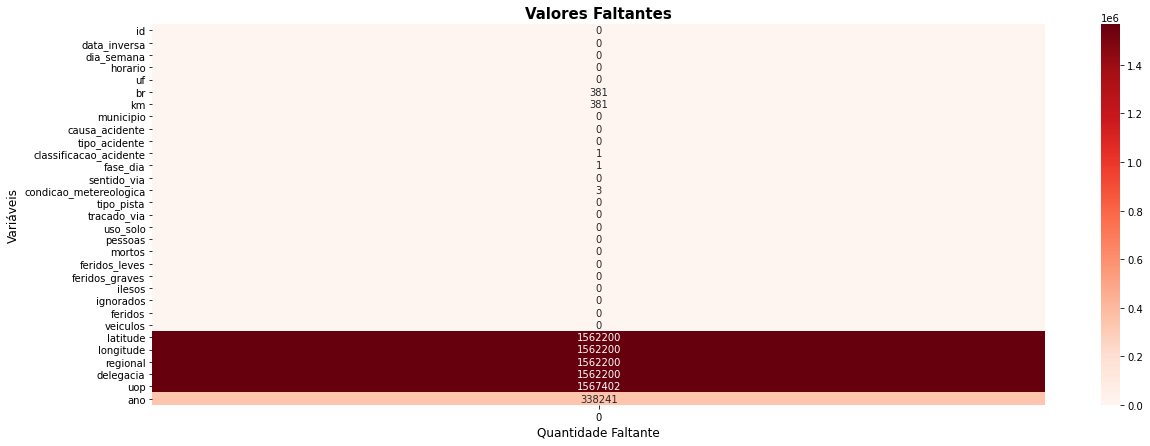

In [41]:
plt.figure(figsize=(20,7))
plt.title('Valores Faltantes',fontweight='bold', fontsize=15)
ax = sns.heatmap(dataset.isna().sum().to_frame(),annot=True,fmt='d',cmap='Reds')
ax.set_ylabel("Variáveis", fontsize=12)
ax.set_xlabel('Quantidade Faltante', fontsize=12)
plt.show()

<font color=darkred size=4>Há muitos valores faltantes para as variáveis:
- latitude, longitude, regional, delegacia,uop e ano.

<font color=darkred size=4>Quais perguntas eu quero responder a priori?
- Qual a quantidade de acidentes em rodovias federais por ano no Brasil?
- Os acidentes estão diminuindo ou aumentando?
- As mortes en acidentes de trânsito estão diminuindo ou aumentando?
- Quais as maiores causas de cidente de trânsito, por ano e por tipo?
- O dia da semana tem relação com os acidentes?
- Quais os estados/regiões que mais causam acidentes?

...